<a href="https://colab.research.google.com/github/J-oyin/Dr.-Jimoh-Analysis/blob/main/GDNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
df = pd.read_excel("/content/Dr.J_GDNF.xlsx")

df.head()


,S/N,Group,GDNF_level,Subject
0,1,Healthy,64.992,RC1
1,2,Healthy,55.094,RC2
2,3,Healthy,51.911,RC3
3,4,Healthy,46.740,RC4
4,5,Healthy,45.726,RC5


In [ ]:
custom_order = [
    "Healthy", "Resilient", "S/DW", "S/Esc",
    "S/LASA", "S/HASA",

]

df["Group"] = pd.Categorical(df["Group"], categories=custom_order, ordered=True)


In [ ]:
print(df['Group'].unique())
print(df['Group'].value_counts())


['Healthy', 'Resilient', 'S/DW', 'S/Esc', 'S/LASA', 'S/HASA']
Categories (6, object): ['Healthy' < 'Resilient' < 'S/DW' < 'S/Esc' < 'S/LASA' < 'S/HASA']
Group
Healthy      5
Resilient    5
S/DW         5
S/Esc        5
S/LASA       5
S/HASA       5
Name: count, dtype: int64


In [ ]:
for grp, sub in df.groupby('Group'):
    stat, p = shapiro(sub['GDNF_level'])
    print(f"{grp}: Shapiro p = {p:.4f}")


Healthy: Shapiro p = 0.4670
Resilient: Shapiro p = 0.4178
S/DW: Shapiro p = 0.2334
S/Esc: Shapiro p = 0.8564
S/LASA: Shapiro p = 0.0067
S/HASA: Shapiro p = 0.1767


/tmp/ipython-input-1379612785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for grp, sub in df.groupby('Group'):


In [ ]:
groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]
stat, p = levene(*groups)
print(f"Levene test p = {p:.4f}")


Levene test p = 0.4700


/tmp/ipython-input-3150884510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]


In [ ]:
from scipy.stats import kruskal

groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]


/tmp/ipython-input-1499598747.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]


In [ ]:
H, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {H:.3f}, p = {p:.4e}")


Kruskal–Wallis H = 22.260, p = 4.6718e-04


In [ ]:
pip install scikit-posthocs


In [ ]:
import scikit_posthocs as sp

dunn = sp.posthoc_dunn(
    df,
    val_col='GDNF_level',
    group_col='Group',
    p_adjust='fdr_bh'
)

print(dunn)


            Healthy  Resilient      S/DW     S/Esc    S/LASA    S/HASA
Healthy    1.000000   0.610652  0.196554  0.196379  0.350962  0.069469
Resilient  0.610652   1.000000  0.069469  0.069469  0.699786  0.196379
S/DW       0.196554   0.069469  1.000000  0.956991  0.036135  0.001385
S/Esc      0.196379   0.069469  0.956991  1.000000  0.036135  0.001385
S/LASA     0.350962   0.699786  0.036135  0.036135  1.000000  0.340826
S/HASA     0.069469   0.196379  0.001385  0.001385  0.340826  1.000000


/tmp/ipython-input-1492771512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Group', y='GDNF_level', palette='Set2')


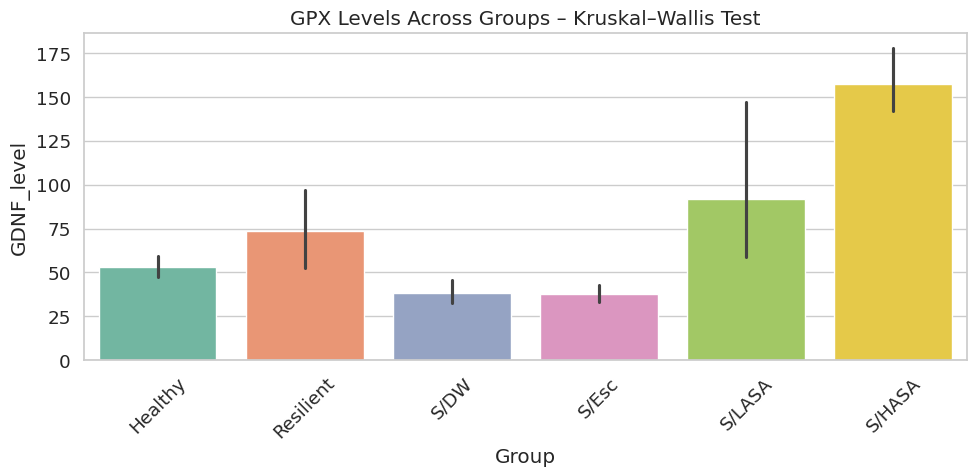

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Group', y='GDNF_level', palette='Set2')
#sns.swarmplot(data=df, x='Group', y='GDNF_level', color='black', size=3)

plt.title("GPX Levels Across Groups – Kruskal–Wallis Test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_plot = (
    df.groupby('Group')['GDNF_level']
      .agg(mean='mean',
           sem=lambda x: x.std(ddof=1)/np.sqrt(len(x)))
      .reset_index()
)


/tmp/ipython-input-1248116283.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group')['GDNF_level']


In [ ]:
# Convert Dunn matrix to long format
sig_pairs = []
for g1 in dunn.index:
    for g2 in dunn.columns:
        if g1 != g2:
            p = dunn.loc[g1, g2]
            if p < 0.05:    # Significant
                sig_pairs.append((g1, g2, p))

print("\nSignificant comparisons:", sig_pairs)



Significant comparisons: [('S/DW', 'S/LASA', np.float64(0.036135414530947374)), ('S/DW', 'S/HASA', np.float64(0.0013849965759206498)), ('S/Esc', 'S/LASA', np.float64(0.036135414530947374)), ('S/Esc', 'S/HASA', np.float64(0.0013849965759206498)), ('S/LASA', 'S/DW', np.float64(0.036135414530947374)), ('S/LASA', 'S/Esc', np.float64(0.036135414530947374)), ('S/HASA', 'S/DW', np.float64(0.0013849965759206498)), ('S/HASA', 'S/Esc', np.float64(0.0013849965759206498))]


In [ ]:
def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'


In [ ]:
reference_groups = ["Healthy", "Resilient"]

filtered_pairs = [
    (g1, g2, p) for (g1, g2, p) in sig_pairs
    if g1 in reference_groups or g2 in reference_groups
]


/tmp/ipython-input-3441254776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


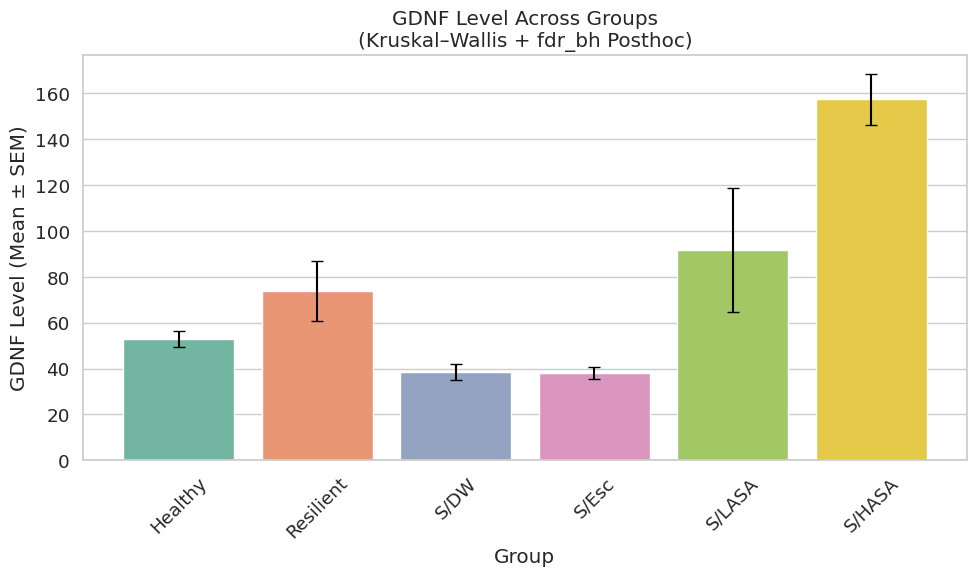

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(
    data=summary_plot,
    x='Group',
    y='mean',
    errorbar=None,
    palette='Set2'
)

# Add SEM error bars
for i, row in summary_plot.iterrows():
    ax.errorbar(i, row['mean'], yerr=row['sem'], fmt='none',
                ecolor='black', capsize=4)

    # Add stars for Dunn-significant pairs
y_max = summary_plot['mean'].max() + summary_plot['sem'].max() + 0.05*summary_plot['mean'].max()
height_step = 0.03 * y_max
current_height = y_max
bump = 0.02 * y_max
for (g1, g2, p) in filtered_pairs:
    x1 = summary_plot.index[summary_plot['Group'] == g1][0]
    x2 = summary_plot.index[summary_plot['Group'] == g2][0]

    stars = p_to_stars(p)

    # Draw connecting bracket
    ax.plot([x1, x1, x2, x2],
        [current_height, current_height + bump,
         current_height + bump, current_height],
        c='black', lw=1)

    # Add stars
    ax.text((x1+x2)/2,
            current_height + 0.03*y_max,
            stars,
            ha='center', va='bottom',
            fontsize=13)

    current_height += height_step  # Stack next annotation above

plt.ylabel("GDNF Level (Mean ± SEM)")
plt.title("GDNF Level Across Groups\n(Kruskal–Wallis + fdr_bh Posthoc)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# ───────────────────────────────
# 1. SUMMARY STATISTICS
# ───────────────────────────────
summary = (
    df.groupby('Group')['GDNF_level']
      .agg(
          N='count',
          Median='median',
          Q1=lambda x: np.percentile(x, 25),
          Q3=lambda x: np.percentile(x, 75),
          Mean='mean',
          SD='std'
      )
      .reset_index()
)

summary['IQR'] = summary['Q3'] - summary['Q1']

print("\n=== SUMMARY TABLE (PER GROUP) ===")
print(summary)


# ───────────────────────────────
# 2. KRUSKAL–WALLIS
# ───────────────────────────────
group_arrays = [vals['GDNF_level'].values for _, vals in df.groupby('Group')]

H, p_kw = kruskal(*group_arrays)

kw_table = pd.DataFrame({
    'H_statistic': [H],
    'p_value': [p_kw]
})

print("\n=== KRUSKAL–WALLIS RESULT ===")
print(kw_table)


# ───────────────────────────────
# 3. DUNN POSTHOC TEST (Holm corrected)
# ───────────────────────────────
dunn = sp.posthoc_dunn(df, val_col='GDNF_level', group_col='Group', p_adjust='holm')

print("\n=== DUNN POSTHOC (fdr_bh-corrected) ===")
print(dunn)


# ───────────────────────────────
# 4. MANUSCRIPT-READY TABLE COMBINED
# ───────────────────────────────
manuscript_table = {
    "Summary": summary,
    "Kruskal_Wallis": kw_table,
    "Dunn_Posthoc": dunn
}

print("\n\n==== MANUSCRIPT READY TABLES GENERATED ====")



=== SUMMARY TABLE (PER GROUP) ===
       Group  N   Median       Q1       Q3      Mean         SD     IQR
0    Healthy  5   51.911   46.740   55.094   52.8926   7.768845   8.354
1  Resilient  5   77.763   49.822   77.763   73.7610  29.458988  27.941
2       S/DW  5   36.927   33.210   38.831   38.4556   8.075228   5.621
3      S/Esc  5   37.875   36.927   39.794   37.9884   5.794398   2.867
4     S/LASA  5   69.552   63.867   74.209   91.7136  60.567778  10.342
5     S/HASA  5  154.297  142.602  155.779  157.4296  24.730568  13.177

=== KRUSKAL–WALLIS RESULT ===
   H_statistic   p_value
0    22.260263  0.000467

=== DUNN POSTHOC (fdr_bh-corrected) ===
            Healthy  Resilient      S/DW     S/Esc    S/LASA    S/HASA
Healthy    1.000000   1.000000  0.876946  0.876946  1.000000  0.283887
Resilient  1.000000   1.000000  0.291770  0.283887  1.000000  0.876946
S/DW       0.876946   0.291770  1.000000  1.000000  0.115633  0.002585
S/Esc      0.876946   0.283887  1.000000  1.000000  0.1

/tmp/ipython-input-2180921710.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group')['GDNF_level']
/tmp/ipython-input-2180921710.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_arrays = [vals['GDNF_level'].values for _, vals in df.groupby('Group')]


In [ ]:
with pd.ExcelWriter("GPX_KW_Analysis.xlsx") as writer:
    summary.to_excel(writer, sheet_name="Summary", index=False)
    kw_table.to_excel(writer, sheet_name="Kruskal", index=False)
    dunn.to_excel(writer, sheet_name="Dunn_Posthoc")


In [ ]:
groups_to_compare = ["Healthy", "Resilient"]

# Generate contrasts manually
pairs_of_interest = [
    ("Healthy", g) for g in summary_plot["Group"] if g != "Healthy"
] + [
    ("Resilient", g) for g in summary_plot["Group"] if g != "Resilient"
]


In [ ]:
import scikit_posthocs as sp

# Produce posthoc matrix (p-values for all)
p_matrix = sp.posthoc_dunn(df, val_col='GDNF_level', group_col='Group', p_adjust='fdr_bh')

# Keep only the contrasts of interest
filtered_pvals = [
    (g1, g2, p_matrix.loc[g1, g2])
    for (g1, g2) in pairs_of_interest
]

/tmp/ipython-input-1033840661.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=summary_plot, x='Group', y='mean', palette='viridis', errorbar=None)


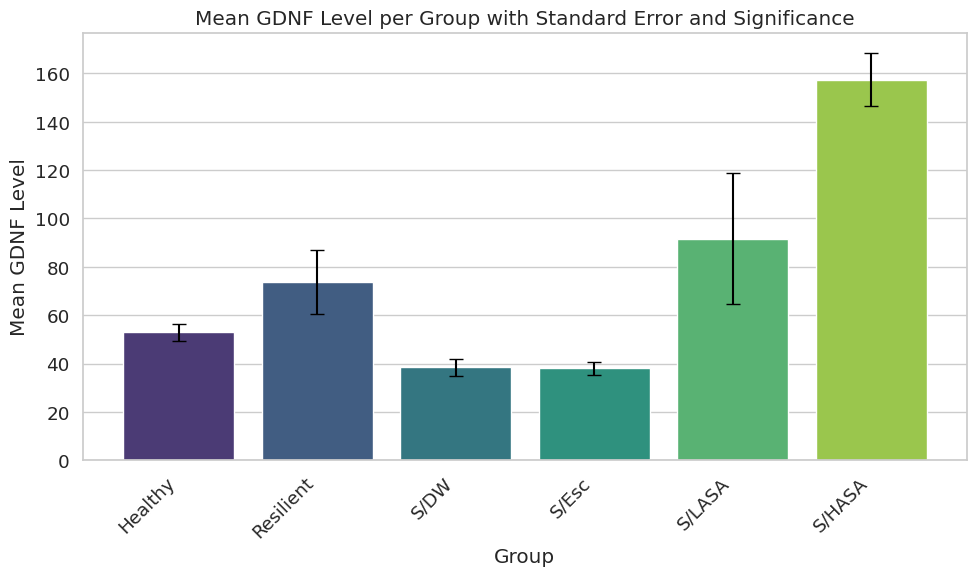

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(data=summary_plot, x='Group', y='mean', palette='viridis', errorbar=None)

# Add SEM error bars
for i, row in summary_plot.iterrows():
    ax.errorbar(i, row['mean'], yerr=row['sem'], fmt='none', ecolor='black', capsize=5)

# Add stars for Dunn-significant pairs
y_max = summary_plot['mean'].max() + summary_plot['sem'].max() + 0.05 * summary_plot['mean'].max()
height_step = 0.03 * y_max
current_height = y_max
bump = 0.02 * y_max

# Get unique group names to ensure correct indexing
group_names = summary_plot['Group'].tolist()

for (g1, g2, p) in filtered_pvals:
    if p < 0.05: # Only plot significant pairs
        try:
            x1 = group_names.index(g1)
            x2 = group_names.index(g2)

            stars = p_to_stars(p)

            # Draw connecting bracket
            ax.plot([x1, x1, x2, x2],
                    [current_height, current_height + bump,
                     current_height + bump, current_height],
                    c='black', lw=1)

            # Add stars
            ax.text((x1 + x2) / 2,
                    current_height + 0.03 * y_max,
                    stars,
                    ha='center', va='bottom',
                    fontsize=13)

            current_height += height_step  # Stack next annotation above
        except ValueError: # Handle cases where a group might not be in the plot
            continue

plt.title('Mean GDNF Level per Group with Standard Error and Significance')
plt.xlabel('Group')
plt.ylabel('Mean GDNF Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Function to convert p-values to stars
def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

# Build summary statistics table
summary_stats = []

for g1, g2, p in filtered_pvals:

    # (optional) compute effect direction using group means
    mean1 = summary_plot.loc[summary_plot['Group'] == g1, 'mean'].values[0]
    mean2 = summary_plot.loc[summary_plot['Group'] == g2, 'mean'].values[0]
    effect_direction = "↑ " + g2 if mean2 > mean1 else "↓ " + g2

    summary_stats.append({
        "Group 1": g1,
        "Group 2": g2,
        "p-value (FDR-BH)": p,
        "Significance": p_to_stars(p),
        "Mean Group 1": mean1,
        "Mean Group 2": mean2,
        "Effect Direction": effect_direction
    })

summary_stats_df = pd.DataFrame(summary_stats)

# Sort results (optional)
summary_stats_df = summary_stats_df.sort_values(by=["Group 1", "p-value (FDR-BH)"])

summary_stats_df


,Group 1,Group 2,p-value (FDR-BH),Significance,Mean Group 1,Mean Group 2,Effect Direction
4,Healthy,S/HASA,0.069469,ns,52.8926,157.4296,↑ S/HASA
2,Healthy,S/Esc,0.196379,ns,52.8926,37.9884,↓ S/Esc
1,Healthy,S/DW,0.196554,ns,52.8926,38.4556,↓ S/DW
3,Healthy,S/LASA,0.350962,ns,52.8926,91.7136,↑ S/LASA
0,Healthy,Resilient,0.610652,ns,52.8926,73.7610,↑ Resilient
6,Resilient,S/DW,0.069469,ns,73.7610,38.4556,↓ S/DW
7,Resilient,S/Esc,0.069469,ns,73.7610,37.9884,↓ S/Esc
9,Resilient,S/HASA,0.196379,ns,73.7610,157.4296,↑ S/HASA
5,Resilient,Healthy,0.610652,ns,73.7610,52.8926,↓ Healthy
8,Resilient,S/LASA,0.699786,ns,73.7610,91.7136,↑ S/LASA
